## 02 - 1 데이터 집합 불러오기(32p)

In [2]:
import pandas as pd
import seaborn as sns

갭마인더 데이터 집합을 불러오려면 read_csv 메서드를 사용해야 한다. 이 메서드는 기본적으로 쉼표(,)로 열이 구분되어 있는 데이터를 불러온다.

하지만 갭마인더는 탭(tab)으로 구분되어 있기 때문에 read_csv 메서드를 호출할 때 열이 탭으로 구분되어 있다고 미리 알려주어야 함
```python
sep = '\t'
```

head 메서드는 데이터프레임에서 가장 앞에 있는 5개의 행을 출력하므로 내가 불러온 데이터가 어떤 값을 가지고 있는지 살펴보기에 좋다.

In [3]:
df = pd.read_csv("C:\\Users\\user\Pandas\doit_pandas\data\gapminder.tsv", sep='\t')
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


판다스는 데이터를 효율적으로 다루기 위해 시리즈와 데이터프레임이라는 자료형을 사용한다.

데이터프레임은 엑셀에서 볼 수 있는 시트와 동일한 개념이며 시리즈는 시트의 열 1개를 의미한다.

파이썬에 비유하면, 데이터프레임은 시리즈들이 각 요소가 되는 **dictionary**라고 생각하면 된다.

In [4]:
print(type(df))         ## -> 판다스의 데이터프레임 자료형
print(df.shape)         ## -> (행, 렬)
print(df.columns)       ## -> 데이터프레임의 열의 이름

<class 'pandas.core.frame.DataFrame'>
(1704, 6)
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


데이터프레임을 구성하는 값의 자료형은 데이터프레임의 dtypes 속성이나 info 메서드로 쉽게 확인할 수 있음

In [5]:
print('< dtypes >\n', df.dtypes, '\n\n')
print(df.info(), '\n\n')

< dtypes >
 country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None 




#### 판다스와 파이썬 자료형 비교
    pandas - object   int64   float64   datetime64

    python - string   int     float     datetime

## 02 - 2 데이터 추출하기 (36p)

### 열 단위로 데이터 추출하기

In [6]:
country_df = df['country']   # 판다스의 시리즈 자료형
print(type(country_df))
print(country_df)

<class 'pandas.core.series.Series'>
0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


In [6]:
print(country_df.head())   # 앞의 5열
print('\n\n')
print(country_df.tail())   # 뒤의 5열

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object



1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


#### 여러 개의 열을 추출 (데이터프레임)

In [7]:
subset = df[['country', 'continent', 'year']]
print(type(subset))   # 이전과 달리 시리즈가 아닌 데이터프레임이다.

print(subset.head())

print('\n\n')
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972



       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


### 행 단위로 데이터 추출하기
1. .loc[] - 인덱스를 기준으로 행 데이터 추출
2. .iloc[] - 행 번호를 기준으로 행 데이터 추출

인덱스는 보통 0부터 시작하지만 행 데이터가 추가, 삭제되면 언제든지 변할 수 있으며 숫자가 아니라 문자열을 사용할 수도 있습니다. (first, second, third와 같은 문자열로 지정 가능)

반면 행 번호는 데이터의 순서를 따라가기 때문에 정수만으로 데이터를 조회하거나 추출할 수 있으며 실제 데이터프레임에서는 확인할 수 없는 값이다.

#### loc 속성으로 행 데이터 추출

In [8]:
print(df.head())
print('\n\n')
print(df.loc[0])   # 첫 번째 행의 정보
print('\n\n')
print(df.loc[99])  # 99 번째 행의 정보

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106



country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object



country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [9]:
df.shape

(1704, 6)

In [10]:
subset = df.loc[:, ['year', 'pop']]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [11]:
df.iloc[0:4, [2, 4, 1]].head()

,year,pop,continent
0,1952,8425333,Asia
1,1957,9240934,Asia
2,1962,10267083,Asia
3,1967,11537966,Asia


### 기초적인 통계 계산하기

In [12]:
df.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


#### lifeExp 열을 연도 별로 그룹화하여 평균 계산하기

In [16]:
pd.DataFrame(df.groupby('year')['lifeExp'])

,0,1
0,1952,0 28.801 12 55.230 24 43.077 3...
1,1957,1 30.332 13 59.280 25 45.685 3...
2,1962,2 31.997 14 64.820 26 48.303 3...
3,1967,3 34.020 15 66.220 27 51.407 3...
4,1972,4 36.088 16 67.690 28 54.518 4...
5,1977,5 38.438 17 68.930 29 58.014 4...
6,1982,6 39.854 18 70.420 30 61.368 4...
7,1987,7 40.822 19 72.000 31 65.799 4...
8,1992,8 41.674 20 71.581 32 67.744 4...
9,1997,9 41.763 21 72.950 33 69.152 4...


In [19]:
print(df.groupby('year')['lifeExp'].mean())
print('-------------')
print(df.groupby)('year')

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64
-------------
<bound method DataFrame.groupby of           country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  119265

TypeError: 'NoneType' object is not callable

In [21]:
type(df.groupby('year'))

pandas.core.groupby.generic.DataFrameGroupBy

### 연도별 대륙별로 lifeExp와 gdpPercap의 평균 계산하기

In [24]:
df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

### continent 기준 항목별로 빈도 수 구하기

In [25]:
df.groupby('continent').nunique()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,52,12,619,624,624
Americas,25,12,299,300,300
Asia,33,12,393,396,396
Europe,30,12,326,360,360
Oceania,2,12,24,24,24


### 해석 :
- country : 각 대륙별 속한 나라의 수
- year : 12개년 치 데이터
- lifeExp : 아마 겹치는 값들이 있어서 pop과 gdp에 비해 수가 적은듯
- pop, gdpPercap : 겹치는 값이 없을 듯

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.sort_values(by='lifeExp')

,country,continent,year,lifeExp,pop,gdpPercap
1292,Rwanda,Africa,1992,23.59900,7290203,737.068595
0,Afghanistan,Asia,1952,28.80100,8425333,779.445314
552,Gambia,Africa,1952,30.00000,284320,485.230659
36,Angola,Africa,1952,30.01500,4232095,3520.610273
1344,Sierra Leone,Africa,1952,30.33100,2143249,879.787736
1,Afghanistan,Asia,1957,30.33200,9240934,820.853030
221,Cambodia,Asia,1977,31.22000,6978607,524.972183
1032,Mozambique,Africa,1952,31.28600,6446316,468.526038
1345,Sierra Leone,Africa,1957,31.57000,2295678,1004.484437
192,Burkina Faso,Africa,1952,31.97500,4469979,543.255241


## 데이터 시각화 하기

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

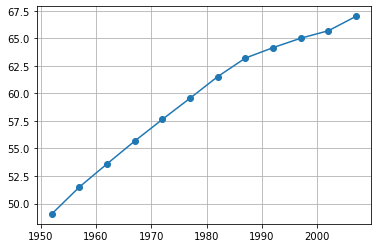

In [35]:
life_mean = df.groupby('year')['lifeExp'].mean()

fig = plt.figure(figsize=(6,4), facecolor='white')
plt.plot(life_mean, marker='o')
plt.grid()
plt.show()

In [36]:
s = pd.Series(['banana', '42'])
s

0    banana
1        42
dtype: object

In [47]:
data = {'Occupation': ['Chemist', 'Statistician'], 
        'Born': ['1920-07-25', '1876-06-13'], 
        'Died': ['1958-04-16', '1937-10-16'], 
        'Age': [37, 61]}

Scientist = pd.DataFrame(data, index=['Rosaline Franklin', 'William Gosset'], 
                        columns=['Occupation', 'Born', 'Age', 'Died'])
Scientist

,Occupation,Born,Age,Died
Rosaline Franklin,Chemist,1920-07-25,37,1958-04-16
William Gosset,Statistician,1876-06-13,61,1937-10-16


### OrderedDict

In [42]:
from collections import OrderedDict

scientists = pd.DataFrame(OrderedDict([
    ('Name', ['Rosaline Franklin', 'William Gosset']), 
    ('Occupation', ['Chemist', 'Statistician']),
    ('Born', ['1920-07-25', '1876-06-13']), 
    ('Died', ['1958-04-16', '1937-10-16']), 
    ('Age', [37, 61])
    ])
    )
print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [48]:
first_row = Scientist.loc['William Gosset']
first_row

Occupation    Statistician
Born            1876-06-13
Age                     61
Died            1937-10-16
Name: William Gosset, dtype: object

#### 시리즈 속성과 메서드 이용하기

In [52]:
print(first_row.index)
print(first_row.values)
print(first_row.keys())

Index(['Occupation', 'Born', 'Age', 'Died'], dtype='object')
['Statistician' '1876-06-13' 61 '1937-10-16']
Index(['Occupation', 'Born', 'Age', 'Died'], dtype='object')


In [54]:
print(first_row.index[0])
print(first_row.keys()[1])

Occupation
Born


In [56]:
age = Scientist['Age']
age

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [58]:
print(age.min())
print(age.max())
print(age.mean())
print(age.std())   # 표본 정규분산

37
61
49.0
16.97056274847714


In [59]:
first_row

Occupation    Statistician
Born            1876-06-13
Age                     61
Died            1937-10-16
Name: William Gosset, dtype: object

### 03 - 3 시리즈 다루기 - 응용 (63p)
- Boolean 추출

In [2]:
import pandas as pd

scientists = pd.read_csv('C:/Users/user/Pandas/doit_pandas/data/scientists.csv')
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [4]:
ages = scientists['Age']

ages.mean(), ages.max(), ages.median(), ages.min()

(59.125, 90, 58.5, 37)

In [7]:
## 평균나이보다 많은 사람만 추출
print(ages > ages.mean())
ages[ages > ages.mean()]

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool


1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [8]:
## 임의로 불린 추출
ages[[True, False, False, True, True, False, False, True]]   # 0 3 4 7

0    37
3    66
4    56
7    77
Name: Age, dtype: int64

In [11]:
print(ages)
print(ages+ages)   # 벡터의 덧셈
print(ages*3)      # 벡터의 스칼라 곱

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0    111
1    183
2    270
3    198
4    168
5    135
6    123
7    231
Name: Age, dtype: int64


In [13]:
print(pd.Series([1, 100]))
print()
print(ages + pd.Series([1, 100]))

0      1
1    100
dtype: int64

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


### 03 - 4 데이터프레임 다루기
- 불린 추출과 브로드캐스팅

### 03 - 5 시리즈와 데이터프레임의 데이터 처리하기 

In [14]:
scientists.head()

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist


In [16]:
born_dt = pd.to_datetime(scientists['Born'], format='%Y-%m-%d')
died_dt = pd.to_datetime(scientists['Died'], format='%Y-%m-%d')

scientists['born_dt'], scientists['died_dt'] = (born_dt, died_dt)
print(scientists.head())

                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist 1867-11-07   
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist 1907-05-27   

     died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  
3 1934-07-04  
4 1964-04-14  


In [19]:
scientists.died_dt - scientists.born_dt

0   13779 days
1   22404 days
2   32964 days
3   24345 days
4   20777 days
5   16529 days
6   15324 days
7   28422 days
dtype: timedelta64[ns]